# Content

<ul>
    <li> Dataframes </li>
    <li> Visual </li>
</ul>

## Indroduction

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN

This is used to check wether the neural network is producing the correct for our test data

## Dataframes

This is following is used to build the test dataframes

In [2]:
mu = 0.5

def van_der_pol(state, t):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x * x) * y - x
    return dxdt, dydt

def states(x, y, t):
    """
        states:
            This will be used to implement the model -van der pol using the odeint
            method. It then returns the states belonging to the system
        Args:
            x (int): This is the x value
            y (int): This is the y value
        Returns
            (<class 'numpy.ndarray'>) : This is the data of the model.
    """
    state_0 = [x, y]
    states = odeint(van_der_pol, state_0, t)
    return states
    
def dataframe(x, y, t, init_x, init_y):
    """
        dataframe:
            This will produce the dataframe of the van der pol model
            showing the x, y state values including the time variable,
            initial x and y state values
        Args:
            x (int):
                The x value state to start from
            y (int): 
                The y value state to start from
            init_x (int) :
                The initial x state value
            init_y (int):
                The initial y state value
        Return:
            (<class 'pandas.core.frame.DataFrame'>): The dataframe of the model
    """
    state = states(x, y, t)
    data = {'time' : t, 'x' : state[:, 0], 'y' : state[:, 1]}
    df = pd.DataFrame(data=data)
    df['initial_x'] = init_x
    df['initial_y'] = init_y
    return df

The test data to go through

In [103]:
t = np.arange(0,200,0.1)
van_df = dataframe(5,5,t,1,1) # test for 1,2,3
van_df

,time,x,y,initial_x,initial_y
0,0.0,5.000000,5.000000,1,1
1,0.1,5.267247,1.094737,1,1
2,0.2,5.309680,-0.007162,1,1
3,0.3,5.291582,-0.292260,1,1
4,0.4,5.257825,-0.367067,1,1
...,...,...,...,...,...
1995,199.5,-1.454927,-1.746171,1,1
1996,199.6,-1.616670,-1.482316,1,1
1997,199.7,-1.750470,-1.190895,1,1
1998,199.8,-1.854644,-0.893189,1,1


We want carry on from t = 199.9 of the van der pol model that is saved in the csv data files. This would be used later to see how accurate the neural network can predict future simulations

In [59]:
time = np.arange(199.9,300,0.1)
test_df = []
for init_x in range(1,5):
    df = pd.DataFrame(pd.read_csv("../../data/train/van.csv", usecols=[0,1,2,3,4]))
    for init_y in range(1,5):
        row = df[(df.initial_x == init_x) & (df.initial_y == init_y ) & (df.t == 199.9)]
        df_1 = dataframe(row.x.item(), row.y.item(),time, init_x, init_x)
    test_df.append(df_1)

This is the length of the test dataframe

In [60]:
len(test_df)

4

The following short data fragements is used to show what is within the data

In [61]:
test_df[0]

,time,x,y,initial_x,initial_y
0,199.9,1.074926,2.353027,1,1
1,200.0,1.302576,2.186497,1,1
2,200.1,1.509682,1.944119,1,1
3,200.2,1.689451,1.643574,1,1
4,200.3,1.837323,1.310853,1,1
...,...,...,...,...,...
996,299.5,-1.946159,-0.527290,1,1
997,299.6,-1.985952,-0.273460,1,1
998,299.7,-2.001874,-0.050192,1,1
999,299.8,-1.997008,0.142619,1,1


In [62]:
test_df[1]

,time,x,y,initial_x,initial_y
0,199.9,1.078202,2.351859,2,2
1,200.0,1.305678,2.184183,2,2
2,200.1,1.512500,1.940787,2,2
3,200.2,1.691897,1.639515,2,2
4,200.3,1.839342,1.306440,2,2
...,...,...,...,...,...
996,299.5,-1.946797,-0.524036,2,2
997,299.6,-1.986282,-0.270561,2,2
998,299.7,-2.001934,-0.047671,2,2
999,299.8,-1.996834,0.144784,2,2


In [63]:
test_df[2]

,time,x,y,initial_x,initial_y
0,199.9,-0.339366,1.948169,3,3
1,200.0,-0.138593,2.066482,3,3
2,200.1,0.073622,2.175418,3,3
3,200.2,0.295812,2.263868,3,3
4,200.3,0.525245,2.317740,3,3
...,...,...,...,...,...
996,299.5,-1.130609,-2.075034,3,3
997,299.6,-1.329914,-1.900357,3,3
998,299.7,-1.508724,-1.667294,3,3
999,299.8,-1.661974,-1.392421,3,3


In [64]:
test_df[3]

,time,x,y,initial_x,initial_y
0,199.9,-2.024739,0.798683,4,4
1,200.0,-1.941043,0.874318,4,4
2,200.1,-1.850011,0.945875,4,4
3,200.2,-1.751917,1.015954,4,4
4,200.3,-1.646798,1.086678,4,4
...,...,...,...,...,...
996,299.5,1.241978,-1.225815,4,4
997,299.6,1.114779,-1.318931,4,4
998,299.7,0.978024,-1.417053,4,4
999,299.8,0.831179,-1.520809,4,4


This will combine all the test dataframes togeth

In [92]:
test_df_combine = pd.concat(test_df)
test_df_combine 

,time,x,y,initial_x,initial_y
0,199.9,-0.020658,2.353027,1,1
1,200.0,-0.020658,2.186497,1,1
2,200.1,-0.020658,1.944119,1,1
3,200.2,-0.020658,1.643574,1,1
4,200.3,-0.020658,1.310853,1,1
...,...,...,...,...,...
996,299.5,-0.020658,-1.225815,4,4
997,299.6,-0.020658,-1.318931,4,4
998,299.7,-0.020658,-1.417053,4,4
999,299.8,-0.020658,-1.520809,4,4


This will add a new column initial_x, initial_y as a tuple column, and drop the initial_x and initial_y columns. this will be used later for plotting the graphs

In [93]:
test_df_combine['initial_x,initial_y'] = list(zip(test_df_combine.initial_x, test_df_combine.initial_y))
test_df_combine = test_df_combine.drop(columns=['initial_x','initial_y'])
test_df_combine

,time,x,y,"initial_x,initial_y"
0,199.9,-0.020658,2.353027,"(1, 1)"
1,200.0,-0.020658,2.186497,"(1, 1)"
2,200.1,-0.020658,1.944119,"(1, 1)"
3,200.2,-0.020658,1.643574,"(1, 1)"
4,200.3,-0.020658,1.310853,"(1, 1)"
...,...,...,...,...
996,299.5,-0.020658,-1.225815,"(4, 4)"
997,299.6,-0.020658,-1.318931,"(4, 4)"
998,299.7,-0.020658,-1.417053,"(4, 4)"
999,299.8,-0.020658,-1.520809,"(4, 4)"


we want to give this data to the neural network to predict.

In [65]:
def preds(num_inputs, num_classes, learning_rate, inputs):
    model_x = NN.prototype(num_inputs, num_classes, learning_rate)
    model_x.load_state_dict(NN.torch.load("../../data/state/van_der_pol/vans_x.pth"))
    preds_x = model_x(inputs).detach().numpy().flatten()
    
    model_y = NN.prototype(num_inputs, num_classes, learning_rate)
    model_y.load_state_dict(NN.torch.load("../../data/state/van_der_pol/vans_x.pth"))
    preds_y = model_y(inputs).detach().numpy().flatten()
    
    return preds_x, preds_y

This is following code will produce predictions made by the neural network from preds_test_df

In [66]:
preds_test_df = []
for i in range(0, len(test_df)):
    preds_x, preds_y = preds(3, 1, 0.01, NN.torch.from_numpy( test_df[i][['time','initial_x','initial_y']].to_numpy(dtype='float32') ))
    df = test_df[i]
    df.x = preds_x
    df.x = preds_y
    df.rename({'x': 'x_preds', 'y': 'y_preds'})
    preds_test_df.append(df)

The next following code would be looking at the predictions which the neural network made

In [67]:
len(preds_test_df)

4

In [68]:
preds_test_df[0]

,time,x,y,initial_x,initial_y
0,199.9,-0.020658,2.353027,1,1
1,200.0,-0.020658,2.186497,1,1
2,200.1,-0.020658,1.944119,1,1
3,200.2,-0.020658,1.643574,1,1
4,200.3,-0.020658,1.310853,1,1
...,...,...,...,...,...
996,299.5,-0.014701,-0.527290,1,1
997,299.6,-0.014680,-0.273460,1,1
998,299.7,-0.014658,-0.050192,1,1
999,299.8,-0.014637,0.142619,1,1


In [69]:
preds_test_df[1]

,time,x,y,initial_x,initial_y
0,199.9,-0.020658,2.351859,2,2
1,200.0,-0.020658,2.184183,2,2
2,200.1,-0.020658,1.940787,2,2
3,200.2,-0.020658,1.639515,2,2
4,200.3,-0.020658,1.306440,2,2
...,...,...,...,...,...
996,299.5,-0.020658,-0.524036,2,2
997,299.6,-0.020658,-0.270561,2,2
998,299.7,-0.020658,-0.047671,2,2
999,299.8,-0.020658,0.144784,2,2


In [70]:
preds_test_df[2]

,time,x,y,initial_x,initial_y
0,199.9,-0.020658,1.948169,3,3
1,200.0,-0.020658,2.066482,3,3
2,200.1,-0.020658,2.175418,3,3
3,200.2,-0.020658,2.263868,3,3
4,200.3,-0.020658,2.317740,3,3
...,...,...,...,...,...
996,299.5,-0.020658,-2.075034,3,3
997,299.6,-0.020658,-1.900357,3,3
998,299.7,-0.020658,-1.667294,3,3
999,299.8,-0.020658,-1.392421,3,3


In [71]:
preds_test_df[3]

,time,x,y,initial_x,initial_y
0,199.9,-0.020658,0.798683,4,4
1,200.0,-0.020658,0.874318,4,4
2,200.1,-0.020658,0.945875,4,4
3,200.2,-0.020658,1.015954,4,4
4,200.3,-0.020658,1.086678,4,4
...,...,...,...,...,...
996,299.5,-0.020658,-1.225815,4,4
997,299.6,-0.020658,-1.318931,4,4
998,299.7,-0.020658,-1.417053,4,4
999,299.8,-0.020658,-1.520809,4,4


## Visualization

We are first looking at the graphs of the actual predictions

<AxesSubplot:xlabel='time', ylabel='y'>

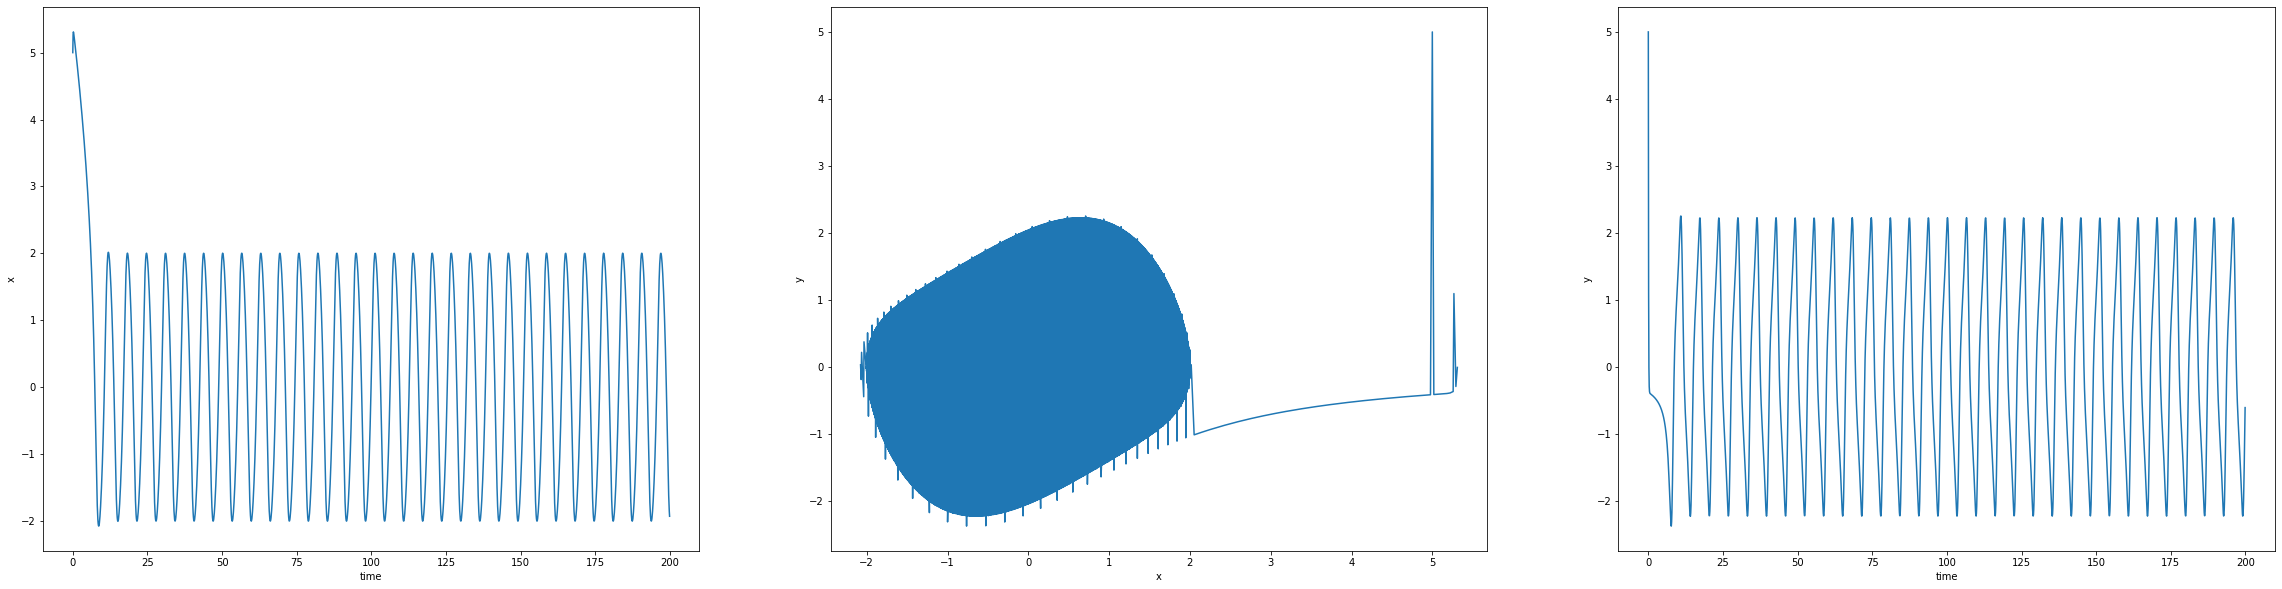

In [101]:
fig, axs = plt.subplots(ncols=3, figsize=(40,10))
sns.lineplot(data=van_df, x="x", y="y", ax=axs[1])
sns.lineplot(data=van_df, x="time", y="x", ax=axs[0])
sns.lineplot(data=van_df, x="time", y="y", ax=axs[2])

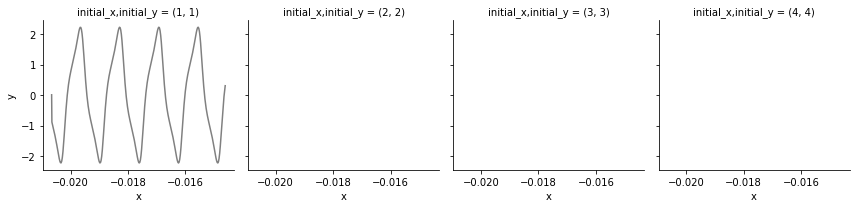

In [99]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

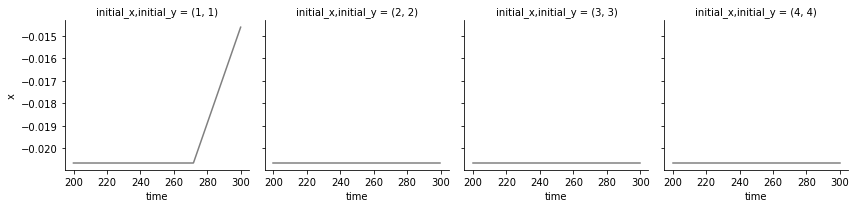

In [96]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y")
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

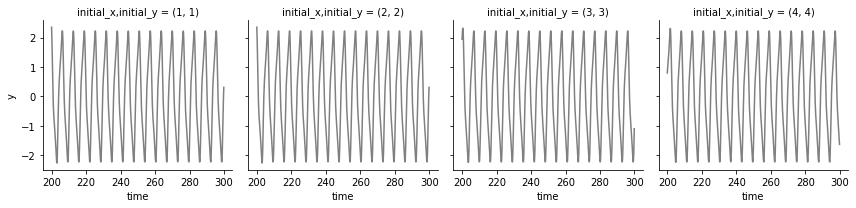

In [97]:
g = sns.FacetGrid(test_df_combine, col="initial_x,initial_y",)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)